# PZAP PROJEKT - Sara Kolac

Moj pProjekt istražuje povezanost namjernica koje se koriste u receptima država s fertilitetom i životnim vijekom te države Koristila sam podatke sa stranice Kaggle::

Recipe Ingredients Dataset, json, autora Kaggle[1]. Dataset napravlje jen zaprediktivnee oodel, pa sadrži train i test datoteku, no nama su važni samo podatci 
a potpuni se nalazr u train.jso ,pa je to .json koji koristim u projektu.

Country Health Trends Dataset, csv, autora Sahir Mahar, datoteka pod imenom gapminder.csv[2]

Temu sam odabrala zbog vlastite znatiželje o sastojcima oko svijeta.

## Rad s .json datotekom

Jedna stavka train.json sadrži id koji se odnosi na id recepta, cuisine koji predstavlja podrijetlio kuhinje te ingredients koji u sebi ima podstavke sastojka potrebnih za recept.
Zbog tog formata .json moramo otvarati s open i posebno učitati stupce koje želimo:

In [111]:
import json
import pandas as pd

with open("train.json", "r") as file:
    data = json.load(file)

df_RECEPIES = pd.DataFrame([
    {
        "ID_Recepie": record["id"],
        "Cuisine": record["cuisine"],
        "Ingredients": ", ".join(record["ingredients"]) 
    }
    for record in data
])

df_RECEPIES.head(15)

,ID_Recepie,Cuisine,Ingredients
0,10259,greek,"romaine lettuce, black olives, grape tomatoes,..."
1,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr..."
2,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,"water, vegetable oil, wheat, salt"
4,13162,indian,"black pepper, shallots, cornflour, cayenne pep..."
5,6602,jamaican,"plain flour, sugar, butter, eggs, fresh ginger..."
6,42779,spanish,"olive oil, salt, medium shrimp, pepper, garlic..."
7,3735,italian,"sugar, pistachio nuts, white almond bark, flou..."
8,16903,mexican,"olive oil, purple onion, fresh pineapple, pork..."
9,12734,italian,"chopped tomatoes, fresh basil, garlic, extra-v..."


Pošto mi je cilj uspoređivati sastojke sa državama ispitujem kojiko različitih kuhinja imamo:

In [113]:
df_RECEPIES["Cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [114]:
df_RECEPIES["Cuisine"].nunique()

20

Koliko recepta ima pojedina kuhinja:

In [117]:
cuisine_counts = df_RECEPIES.groupby('Cuisine')['ID_Recepie'].nunique()

cuisine_counts

Cuisine
brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
Name: ID_Recepie, dtype: int64

Koliko različitih sastojaka ima:

In [122]:
df_copy = df_RECEPIES.copy()

df_copy["Ingredients"] = df_copy["Ingredients"].str.split(", ")

unique_ingredients_per_cuisine = df_copy.explode("Ingredients")["Ingredients"].groupby(df_copy["Cuisine"]).nunique()

unique_ingredients_per_cuisine

Cuisine
brazilian        853
british         1166
cajun_creole    1580
chinese         1796
filipino         949
french          2106
greek           1203
indian          1667
irish           1002
italian         2936
jamaican         878
japanese        1442
korean           898
mexican         2695
moroccan         975
russian          872
southern_us     2468
spanish         1268
thai            1380
vietnamese      1111
Name: Ingredients, dtype: int64

Primjer prvih pedeset najkorištenijih sastojaka u grčkoj kuhiunji:

In [124]:
greek_cuisine_df = df_RECEPIES[df_RECEPIES["Cuisine"] == "greek"]

ingredient_counts = greek_cuisine_df["Ingredients"].str.split(", ", expand=True).stack().value_counts()

ingredient_counts.head(50)

salt                        572
olive oil                   504
dried oregano               267
garlic cloves               254
feta cheese crumbles        252
extra-virgin olive oil      229
fresh lemon juice           222
ground black pepper         221
garlic                      216
pepper                      203
feta cheese                 191
cucumber                    187
purple onion                186
onions                      185
lemon juice                 183
tomatoes                    156
water                       143
lemon                       129
fresh parsley               113
fresh dill                  108
all-purpose flour           100
red wine vinegar             99
butter                       90
black pepper                 89
kosher salt                  85
greek yogurt                 84
fresh oregano                83
eggs                         80
kalamata                     78
sugar                        77
ground cinnamon              73
large eg

## Rad sa csv

In [126]:
df_COUNTRIES = pd.read_csv('gapminder.csv')

df_COUNTRIES.head(20)

,Country,LifeExpectancy,FertilityRate,Population,Region
0,Afghanistan,51.000,7.81,19701940,South Asia
1,Albania,74.200,2.47,3121965,Europe & Central Asia
2,Algeria,73.200,2.63,31183658,Middle East & North Africa
3,Angola,52.600,6.88,15058638,Sub-Saharan Africa
4,Antigua and Barbuda,73.900,2.32,77648,America
5,Argentina,74.300,2.54,37057453,America
6,Armenia,71.400,1.40,3076098,Europe & Central Asia
7,Aruba,74.919,1.91,90858,America
8,Australia,79.700,1.76,"19,107,251",East Asia & Pacific
9,Austria,78.200,1.34,"8,050,884",Europe & Central Asia


.csv datoteka spremna je za spajanje

## Spajanje datoteka u .json

Datoteke želimo spoiti po državi, ali u receptima nemamo državu podrijetla nego demonim, tj. podrijetlo kuhinje. Primjer umjesto greek želimo Greece.
Problem za cajun_creole pošto označava kuhinmju grupe ljudi , a ne državu, rješila sam to tako da sam mapirala po georafskoj lokaciji.
Postoji csv datoteka sa demonimima svih država, ali je prevelika i nesiplativa za implementaciju pošto imamo samo 20 različitih kuhinja pa ručno mapiramo državu sa kuhinju i dodajemo novi stupac država po kojim će mo spoiti datoteke.

In [130]:
#mapiramo
demonyms_to_countries = {
    "greek": "Greece",
    "southern_us": "United States",
    "filipino": "Philippines",
    "indian": "India",
    "jamaican": "Jamaica",
    "spanish": "Spain",
    "italian": "Italy",
    "mexican": "Mexico",
    "chinese": "China",
    "british": "United Kingdom",
    "thai": "Thailand",
    "vietnamese": "Vietnam",
    "cajun_creole": "United States",
    "brazilian": "Brazil",
    "french": "France",
    "japanese": "Japan",
    "irish": "Ireland",
    "korean": "South Korea",
    "moroccan": "Morocco",
    "russian": "Russia"
}

df_RECEPIES["Country"] = df_RECEPIES["Cuisine"].map(demonyms_to_countries)

df_RECEPIES.info

<bound method DataFrame.info of        ID_Recepie      Cuisine  \
0           10259        greek   
1           25693  southern_us   
2           20130     filipino   
3           22213       indian   
4           13162       indian   
...           ...          ...   
39769       29109        irish   
39770       11462      italian   
39771        2238        irish   
39772       41882      chinese   
39773        2362      mexican   

                                             Ingredients        Country  
0      romaine lettuce, black olives, grape tomatoes,...         Greece  
1      plain flour, ground pepper, salt, tomatoes, gr...  United States  
2      eggs, pepper, salt, mayonaise, cooking oil, gr...    Philippines  
3                      water, vegetable oil, wheat, salt          India  
4      black pepper, shallots, cornflour, cayenne pep...          India  
...                                                  ...            ...  
39769  light brown sugar, granulated suga

In [131]:
df_RECEPIES.head()

,ID_Recepie,Cuisine,Ingredients,Country
0,10259,greek,"romaine lettuce, black olives, grape tomatoes,...",Greece
1,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr...",United States
2,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr...",Philippines
3,22213,indian,"water, vegetable oil, wheat, salt",India
4,13162,indian,"black pepper, shallots, cornflour, cayenne pep...",India


Sad kad nam df_RECEPIES ima i stupac država, možemo preko njega povezati sa df_COUNTRIES. Zajednički csv napravila sam tako da sam iz df_COUNTRIES uzela LifeExpectancy, FertilityRat, Population i Region dok sam iz df_RECEPIES uzela Cuisine te umjesto pojednih recepta uzela sam top 50 sastojaka iz svake kuhinje.
Povezano pomoću ChatGPT.[3]

In [136]:
merged_df = df_RECEPIES.merge(df_COUNTRIES, on="Country", how="inner")

top_ingredients_per_country = []

for country in merged_df["Country"].unique():
    country_cuisine_df = merged_df[merged_df["Country"] == country]
    
    ingredient_counts = (
        country_cuisine_df["Ingredients"]
        .str.split(", ", expand=True) 
        .stack()
        .value_counts() #nadjemo najpopularnije
        .head(50) # prvih 50 sastojaka
        .index.tolist() #ne zelim brojeve koliko 
    )
    top_ingredients_per_country.append({
        "Country": country,
        "LifeExpectancy": country_cuisine_df["LifeExpectancy"].iloc[0],
        "FertilityRate": country_cuisine_df["FertilityRate"].iloc[0],
        "Population": country_cuisine_df["Population"].iloc[0],
        "Region": country_cuisine_df["Region"].iloc[0],
        "Cuisine": country_cuisine_df["Cuisine"].iloc[0],
        "TopIngredients": ingredient_counts  
    })


with open("cuisines_and_top_ingredients.json", "w") as f:
    json.dump(top_ingredients_per_country, f, indent=4)

print(json.dumps(top_ingredients_per_country, indent=4))

[
    {
        "Country": "Greece",
        "LifeExpectancy": 78.0,
        "FertilityRate": 1.27,
        "Population": "10,954,032",
        "Region": "Europe & Central Asia",
        "Cuisine": "greek",
        "TopIngredients": [
            "salt",
            "olive oil",
            "dried oregano",
            "garlic cloves",
            "feta cheese crumbles",
            "extra-virgin olive oil",
            "fresh lemon juice",
            "ground black pepper",
            "garlic",
            "pepper",
            "feta cheese",
            "cucumber",
            "purple onion",
            "onions",
            "lemon juice",
            "tomatoes",
            "water",
            "lemon",
            "fresh parsley",
            "fresh dill",
            "all-purpose flour",
            "red wine vinegar",
            "butter",
            "black pepper",
            "kosher salt",
            "greek yogurt",
            "fresh oregano",
            "eggs",
        

## Spajanje u .csv

Iz spojenog .json napravila sam spojeni csv koji će se dalje koristiti za bazu i API.
ChatGPT pomogao[4]: 

In [141]:
for entry in top_ingredients_per_country:
    
    entry["TopIngredients"] = ", ".join(entry["TopIngredients"])

df = pd.DataFrame(top_ingredients_per_country)


df.to_csv("cuisines_with_ingredients.csv", index=False)

In [142]:
dfSKUPA = pd.read_csv('cuisines_with_ingredients.csv')

dfSKUPA.head(20)

,Country,LifeExpectancy,FertilityRate,Population,Region,Cuisine,TopIngredients
0,Greece,78.0,1.27,"10,954,032",Europe & Central Asia,greek,"salt, olive oil, dried oregano, garlic cloves,..."
1,United States,77.1,2.01,"282,895,741",America,southern_us,"salt, butter, all-purpose flour, sugar, onions..."
2,Philippines,69.0,3.85,77932247,East Asia & Pacific,filipino,"salt, garlic, onions, water, soy sauce, pepper..."
3,India,61.1,3.21,1053481072,South Asia,indian,"salt, onions, garam masala, water, ground turm..."
4,Jamaica,72.7,2.63,2600095,America,jamaican,"salt, onions, water, garlic, ground allspice, ..."
5,Spain,79.3,1.21,40749800,Europe & Central Asia,spanish,"salt, olive oil, garlic cloves, extra-virgin o..."
6,Italy,79.6,1.21,"57,147,081",Europe & Central Asia,italian,"salt, olive oil, garlic cloves, grated parmesa..."
7,Mexico,75.1,2.71,102808590,America,mexican,"salt, onions, ground cumin, garlic, olive oil,..."
8,China,71.5,1.45,"1,269,974,572",East Asia & Pacific,chinese,"soy sauce, sesame oil, salt, corn starch, suga..."
9,United Kingdom,77.8,1.69,58867004,Europe & Central Asia,british,"salt, all-purpose flour, butter, milk, eggs, u..."


## Spremanje u bazu

Za spremanje u bazu odlučila sam koristiti sqlLite, za kojeg sam se odlučila zbog lake implementacije i lakog čitanja podataka koje se moće napraviti i na web-u sa sqlLite viewer[4]. Implementacija rađena po primjeru 
Jie Jen[5]:


In [37]:
import sqlite3

dfBAZA = pd.read_csv('cuisines_with_ingredients.csv')

dfBAZA.columns = df.columns.str.strip()

connection = sqlite3.connect('baza.db')

df.to_sql('tablica1', connection, if_exists='replace', dtype={'TopIngredients': 'TEXT'})

connection.close()

## REST API

Api koristi Flask, za kojeg sam se odlučila zbopg jednostavnosti primjene

In [103]:
from flask import Flask, Response, request
import pandas as pd
import json

app = Flask(__name__)

csv_file = 'cuisines_with_ingredients.csv'
data = pd.read_csv(csv_file)


@app.route('/countries', methods=['GET'])
def get_all_data():
    data_list = data.to_dict(orient='records')
    response = Response(json.dumps({'data': data_list}, indent=2), content_type='application/json; charset=utf-8')
    return response


@app.route('/countries/<string:country_name>', methods=['GET'])
def get_country_by_name(country_name):
    filtered_data = data[data['Country'].str.lower() == country_name.lower()]
    
    if not filtered_data.empty:
        country_data = filtered_data.to_dict(orient='records')[0]
        response = Response(json.dumps(country_data, indent=2), content_type='application/json; charset=utf-8')
        return response
    else:
        return Response(json.dumps({"message": "Country not found"}), status=404, content_type='application/json')


@app.route('/countries/<string:country_name>', methods=['DELETE'])
def delete_country_by_name(country_name):
    global data
    original_length = len(data)
    data = data[data['Country'].str.lower() != country_name.lower()]
    
    if len(data) < original_length:
        return Response(json.dumps({"message": "Country deleted successfully"}), status=200, content_type='application/json')
    else:
        return Response(json.dumps({"message": "Country not found"}), status=404, content_type='application/json')

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


## Vizualizacija

Pomoć sa vizualizacijama[7]: 

Graf jedan prikazuje fertelitiet i životni vjek po kuhinjama

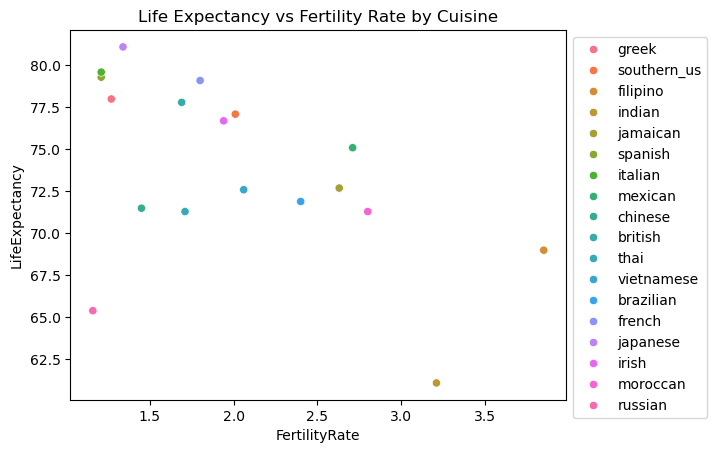

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=dfSKUPA,
    x='FertilityRate',
    y='LifeExpectancy',
    hue='Cuisine',
    sizes=(20, 200)
)
plt.title("Life Expectancy vs Fertility Rate by Cuisine")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Graf 2 fertelitiet i životni vjek po regijama

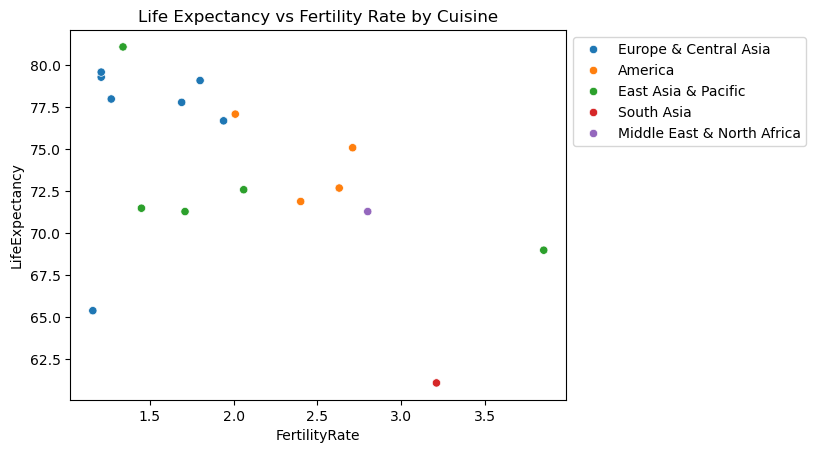

In [150]:
sns.scatterplot(
    data=dfSKUPA,
    x='FertilityRate',
    y='LifeExpectancy',
    hue='Region',
    sizes=(20, 200)
)
plt.title("Life Expectancy vs Fertility Rate by Cuisine")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Graf 3, najpopularnije namjernicem, općenito

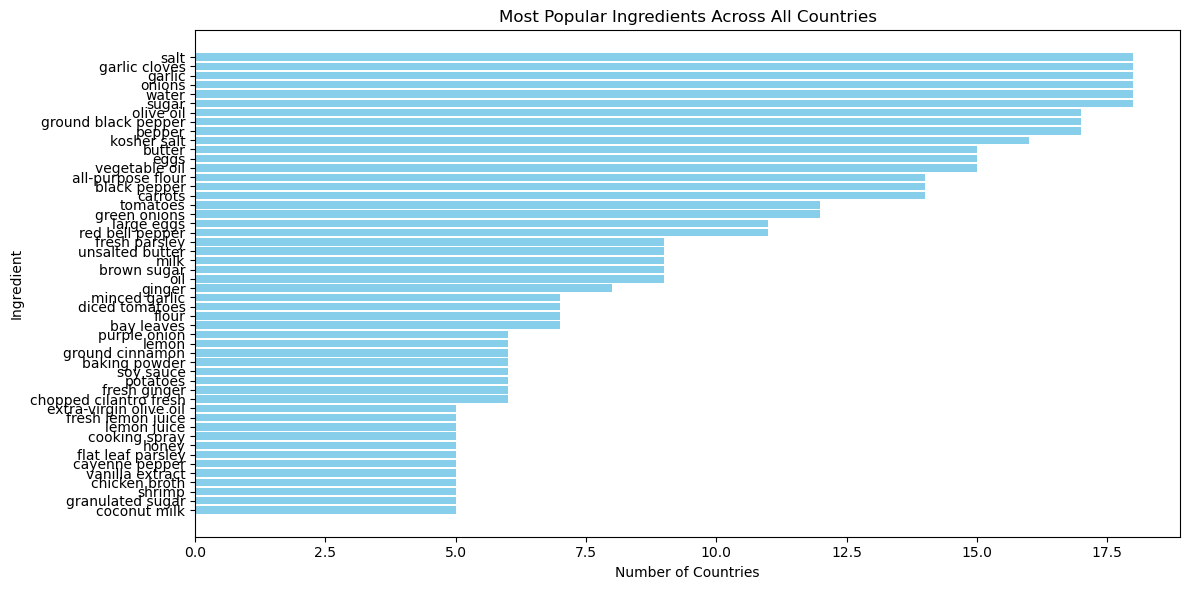

In [152]:
from collections import Counter

df = pd.read_csv("cuisines_with_ingredients.csv")

all_ingredients = df["TopIngredients"].str.split(", ").explode()
ingredient_counts = Counter(all_ingredients)

sorted_ingredients = ingredient_counts.most_common()

ingredient_df = pd.DataFrame(sorted_ingredients, columns=["Ingredient", "Count"])

top_n = 50
plt.figure(figsize=(12, 6))
plt.barh(ingredient_df["Ingredient"][:top_n][::-1], ingredient_df["Count"][:top_n][::-1], color="skyblue")
plt.xlabel("Number of Countries")
plt.ylabel("Ingredient")
plt.title("Most Popular Ingredients Across All Countries")
plt.tight_layout()
plt.show()

Graf 4 50 najpopularnijih namjernica i njihova distirbucija po regijama

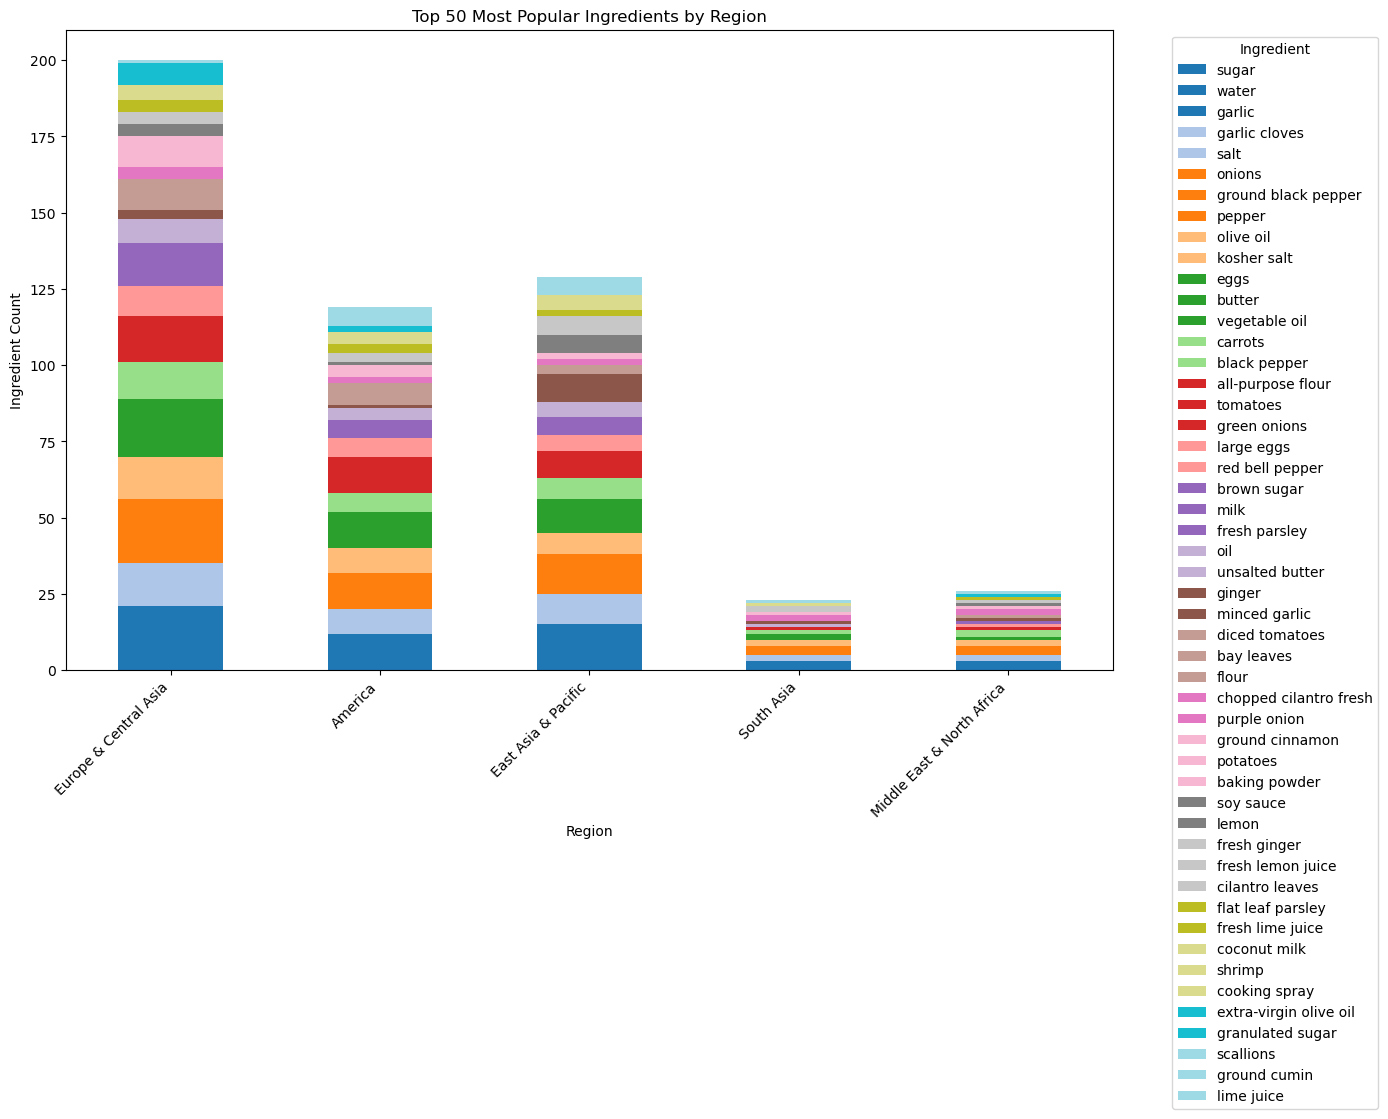

In [164]:
from collections import defaultdict
df = pd.read_csv("cuisines_with_ingredients.csv")

region_ingredient_map = defaultdict(list)

for _, row in df.iterrows():
    region = row["Region"]
    ingredients = row["TopIngredients"].split(", ") 
    region_ingredient_map[region].extend(ingredients)

region_ingredient_counts = {
    region: pd.Series(ingredients).value_counts() for region, ingredients in region_ingredient_map.items()
}

ingredient_df = pd.DataFrame(region_ingredient_counts).fillna(0).astype(int)

top_ingredients = ingredient_df.sum(axis=1).sort_values(ascending=False).head(50).index
filtered_df = ingredient_df.loc[top_ingredients]

filtered_df.T.plot(kind="bar", stacked=True, figsize=(14, 10), colormap="tab20")
plt.title("Top 50 Most Popular Ingredients by Region")
plt.xlabel("Region")
plt.ylabel("Ingredient Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Ingredient", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Namjernice koje povećavaju fertelitet

Članak UCLA Health[8] donosi listu namjernica koje povećavaju fertelitet. To su orasi(Walnuts), rajčice(Tomatoes), citrusi: u članku su navedeni grejp(Grapefruit), limuni(Lemon), naranđe(Orange), mandarine(Tangerines), Mlječni prozvodi(Full-fat dairy), grah i leća(Beans and lentils), Sardine i losos(Sardines and salmon). Za analizu odabrala sam orase, rajčicu i losos

### Priprema podataka

Nemoćemo koristiti iste spojene podatke jer smo prije uzeli top 50 sastojka iz svake kuhinje a sad moramo prebrojiti koliko se sastojak često koristi

In [47]:
df_ALL = pd.merge(df_RECEPIES, df_COUNTRIES, on='Country', how='inner')
df_ALL

,ID_Recepie,Cuisine,Ingredients,Country,LifeExpectancy,FertilityRate,Population,Region
0,10259,greek,"romaine lettuce, black olives, grape tomatoes,...",Greece,78.0,1.27,"10,954,032",Europe & Central Asia
1,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr...",United States,77.1,2.01,"282,895,741",America
2,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr...",Philippines,69.0,3.85,77932247,East Asia & Pacific
3,22213,indian,"water, vegetable oil, wheat, salt",India,61.1,3.21,1053481072,South Asia
4,13162,indian,"black pepper, shallots, cornflour, cayenne pep...",India,61.1,3.21,1053481072,South Asia
...,...,...,...,...,...,...,...,...
38939,29109,irish,"light brown sugar, granulated sugar, butter, w...",Ireland,76.7,1.94,"3,841,574",Europe & Central Asia
38940,11462,italian,"KRAFT Zesty Italian Dressing, purple onion, br...",Italy,79.6,1.21,"57,147,081",Europe & Central Asia
38941,2238,irish,"eggs, citrus fruit, raisins, sourdough starter...",Ireland,76.7,1.94,"3,841,574",Europe & Central Asia
38942,41882,chinese,"boneless chicken skinless thigh, minced garlic...",China,71.5,1.45,"1,269,974,572",East Asia & Pacific


In [49]:
df_CLEAN = df_ALL.drop(columns=['LifeExpectancy', 'Population', 'ID_Recepie', 'Cuisine'])

df_CLEAN

,Ingredients,Country,FertilityRate,Region
0,"romaine lettuce, black olives, grape tomatoes,...",Greece,1.27,Europe & Central Asia
1,"plain flour, ground pepper, salt, tomatoes, gr...",United States,2.01,America
2,"eggs, pepper, salt, mayonaise, cooking oil, gr...",Philippines,3.85,East Asia & Pacific
3,"water, vegetable oil, wheat, salt",India,3.21,South Asia
4,"black pepper, shallots, cornflour, cayenne pep...",India,3.21,South Asia
...,...,...,...,...
38939,"light brown sugar, granulated sugar, butter, w...",Ireland,1.94,Europe & Central Asia
38940,"KRAFT Zesty Italian Dressing, purple onion, br...",Italy,1.21,Europe & Central Asia
38941,"eggs, citrus fruit, raisins, sourdough starter...",Ireland,1.94,Europe & Central Asia
38942,"boneless chicken skinless thigh, minced garlic...",China,1.45,East Asia & Pacific


#### 1. Orasi:

Provjerimo sadrže li recepti orahe:

In [55]:
df_CLEAN[df_CLEAN["Ingredients"].str.contains("walnuts")]

,Ingredients,Country,FertilityRate,Region
12,"Italian parsley leaves, walnuts, hot red peppe...",Italy,1.21,Europe & Central Asia
56,"melted butter, matcha green tea powder, white ...",Japan,1.34,East Asia & Pacific
682,"toasted walnuts, honey, plain yogurt, vanilla",Greece,1.27,Europe & Central Asia
801,"olive oil, abbamele, wild mushrooms, kosher sa...",Italy,1.21,Europe & Central Asia
828,"ground cinnamon, honey, raisins, toasted walnu...",Italy,1.21,Europe & Central Asia
...,...,...,...,...
38004,"pepper, leeks, extra-virgin olive oil, broccol...",France,1.80,Europe & Central Asia
38138,"sugar, whipping cream, semi-sweet chocolate mo...",United Kingdom,1.69,Europe & Central Asia
38158,"prunes, chopped walnuts, garlic, mayonaise, be...",Russia,1.16,Europe & Central Asia
38191,"chocolate ice cream, chocolate wafer cookies, ...",France,1.80,Europe & Central Asia


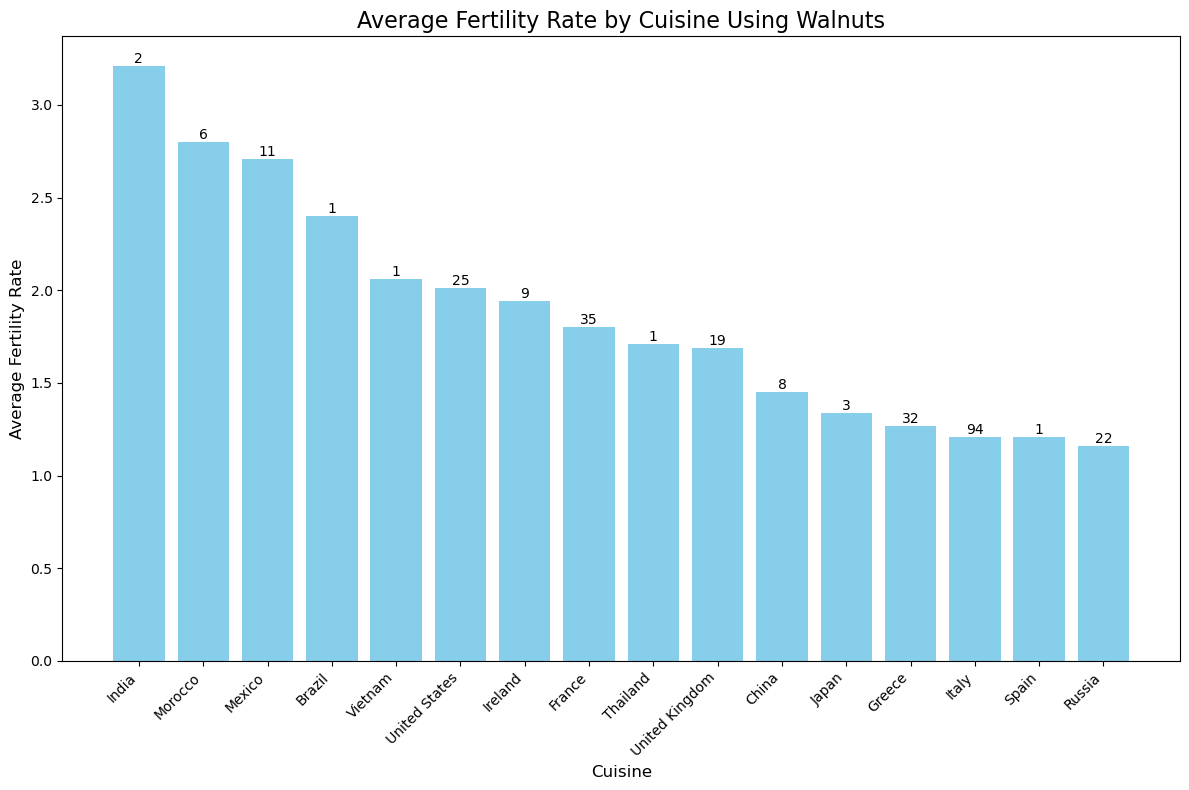

In [162]:
df_CLEAN["Ingredients"] = df_CLEAN["Ingredients"].str.lower()
walnut_data = df_CLEAN[df_CLEAN["Ingredients"].str.contains("walnuts")]


walnut_summary = walnut_data.groupby("Country").agg(
    AvgFertilityRate=("FertilityRate", "mean"),
    WalnutCount=("Ingredients", "size")
).sort_values(by="AvgFertilityRate", ascending=False)


plt.figure(figsize=(12, 8))
bars = plt.bar(
    walnut_summary.index,
    walnut_summary["AvgFertilityRate"],
    color="skyblue"
)

for bar, count in zip(bars, walnut_summary["WalnutCount"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Average Fertility Rate by Cuisine Using Walnuts", fontsize=16)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Average Fertility Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


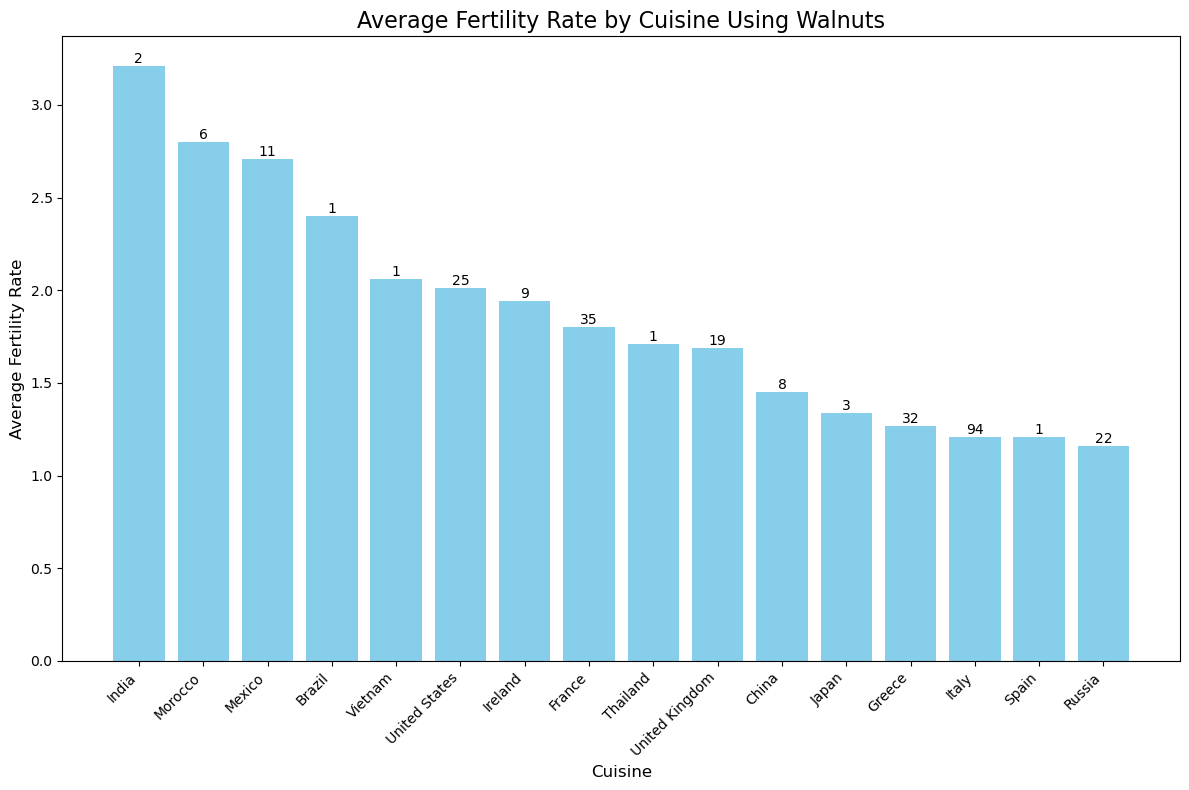

In [81]:
df_CLEAN["Ingredients"] = df_CLEAN["Ingredients"].str.lower()
walnut_data = df_CLEAN[df_CLEAN["Ingredients"].str.contains("walnuts")]


walnut_summary = walnut_data.groupby("Country").agg(
    AvgFertilityRate=("FertilityRate", "mean"),
    WalnutCount=("Ingredients", "size")
).sort_values(by="AvgFertilityRate", ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    walnut_summary.index,
    walnut_summary["AvgFertilityRate"],
    color="skyblue"
)

for bar, count in zip(bars, walnut_summary["WalnutCount"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Average Fertility Rate by Cuisine Using Walnuts", fontsize=16)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Average Fertility Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### 2. Rajčica

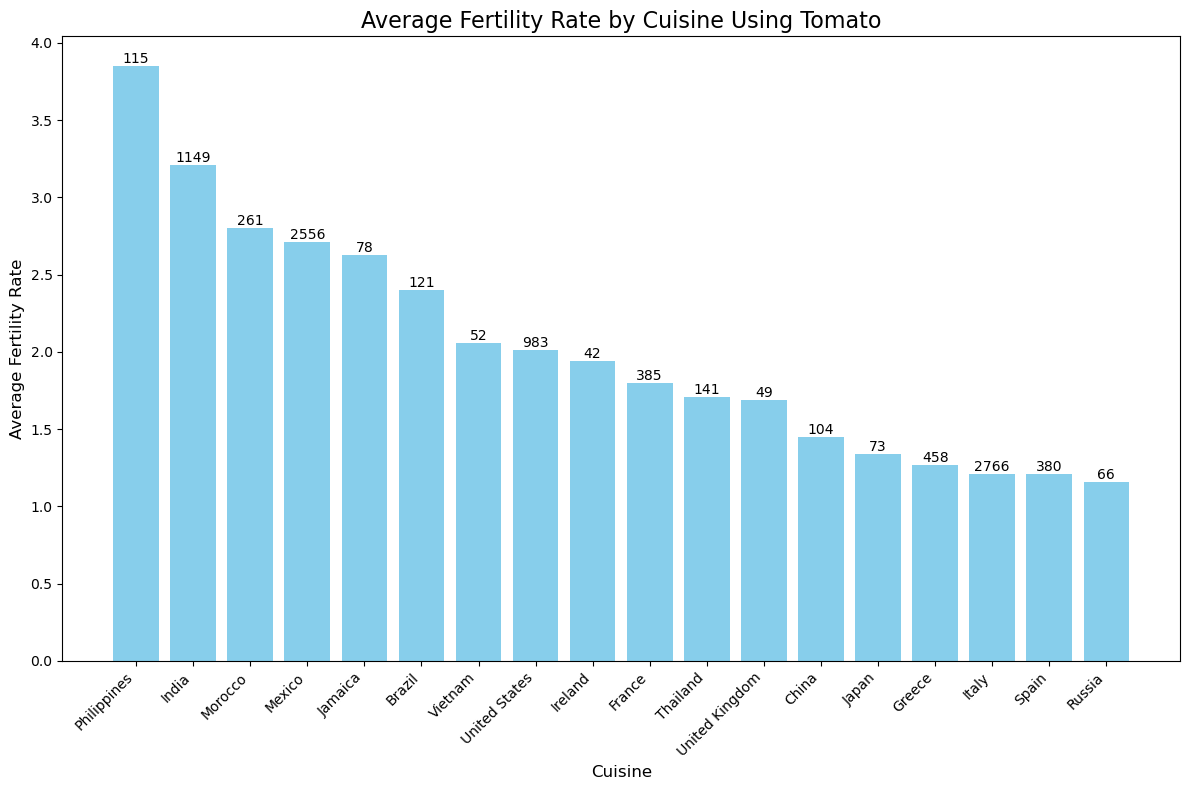

In [160]:
df_CLEAN["Ingredients"] = df_CLEAN["Ingredients"].str.lower()
walnut_data = df_CLEAN[df_CLEAN["Ingredients"].str.contains("tomato")]


walnut_summary = walnut_data.groupby("Country").agg(
    AvgFertilityRate=("FertilityRate", "mean"),
    WalnutCount=("Ingredients", "size")
).sort_values(by="AvgFertilityRate", ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    walnut_summary.index,
    walnut_summary["AvgFertilityRate"],
    color="skyblue"
)

for bar, count in zip(bars, walnut_summary["WalnutCount"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Average Fertility Rate by Cuisine Using Tomato", fontsize=16)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Average Fertility Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


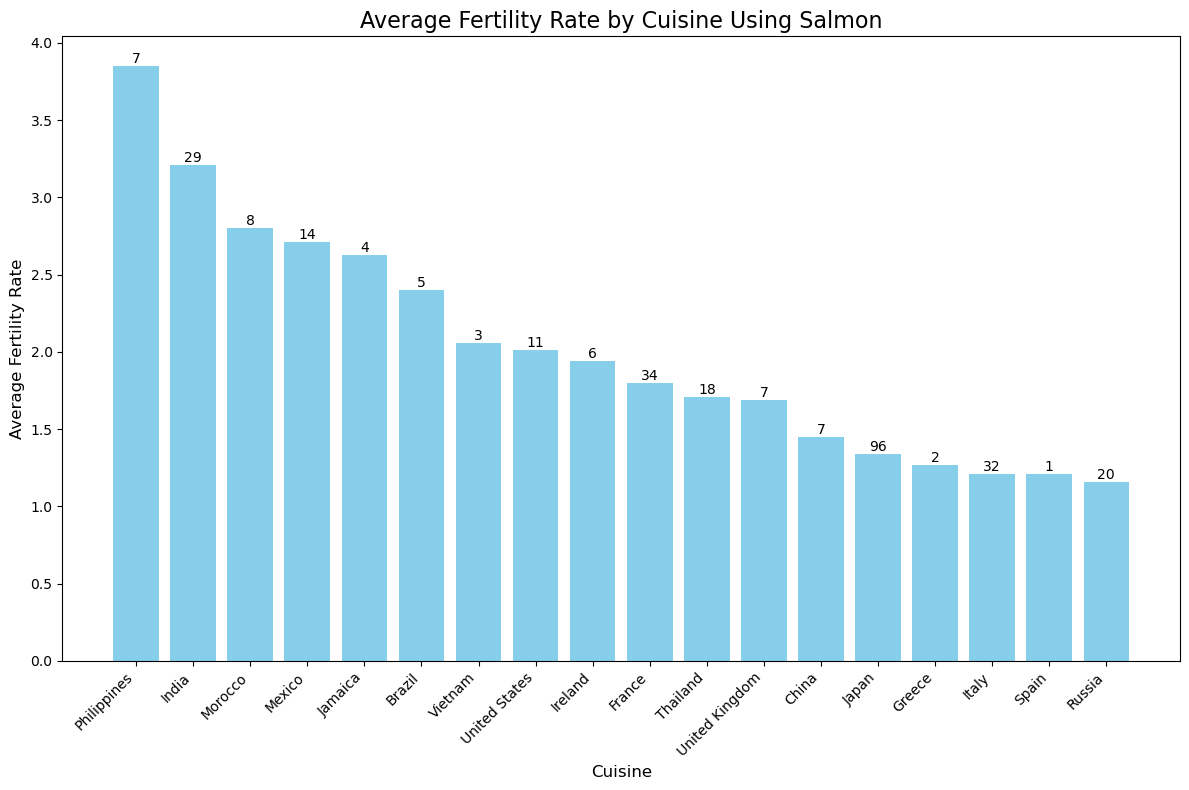

In [158]:
df_CLEAN["Ingredients"] = df_CLEAN["Ingredients"].str.lower()
walnut_data = df_CLEAN[df_CLEAN["Ingredients"].str.contains("salmon")]


walnut_summary = walnut_data.groupby("Country").agg(
    AvgFertilityRate=("FertilityRate", "mean"),
    WalnutCount=("Ingredients", "size")
).sort_values(by="AvgFertilityRate", ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    walnut_summary.index,
    walnut_summary["AvgFertilityRate"],
    color="skyblue"
)

for bar, count in zip(bars, walnut_summary["WalnutCount"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Average Fertility Rate by Cuisine Using Salmon", fontsize=16)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Average Fertility Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Interpretacija: Nijedna namjernica nije direktno povezana sa fertelitetom, na primjeru lososa to s4e vidi tako da su Italija i Španjolska na istoj razini ferteliteta ali sa razlikom on 31 u receptima sa lososom. Takav trend nalazi se i na drugim grafovima

Zaključak: Fertelitet, a i životni vijek vezani su uz regiju i same namjernice. Namjernice su unutar regije slične, ali je slična je i politika. Vjerujem da su vanjski utjecaji(politički, geografski) veći faktor nego hrana.

Literatura: <br>
[1] Esther Kim, “Recipe Ingredients Dataset,” Kaggle. https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset<br>
[2] Sahir Mahar, “Country Health Trends Dataset.” https://www.kaggle.com/datasets/sahirmaharajj/country-health-trends-dataset<br>
[3] ChatGPT. https://chatgpt.com/share/6795190d-a570-8003-a9b5-78efab65caae<br>
[4] ChatGPT. https://chatgpt.com/c/6792a040-e8c0-8003-b161-309168fe671e<br>
[5] Sqlite Viewer. https://inloop.github.io/sqlite-viewer/<br>
[6] Jie Jenn, “Upload A CSV File (Or Any Data File) To SQLite Using Python,” YouTube, 2023. https://www.youtube.com/watch?v=UZIhVmkrAEs<br>
[7] ChatGPT. https://chatgpt.com/share/6793de80-488c-8003-a041-1088846571cc<br>
[8] “6 foods that boost fertility,” UCLA Health. https://www.uclahealth.org/news/article/6-foods-boost-fertility<br>